# Group Members

Harini Mantripragada, Te-Yu(Daniel) Yang, Matthew Rumrill, Reem Alyami, Yekaalo Gebremeskel, Pranav Senthil 


# Part 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

!pip install pandas openpyxl xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
rating = pd.read_excel('/content/drive/Shareddrives/Group Project 745/rating.xlsx')

In [ ]:
rating_without_nulls = rating.dropna()

In [ ]:
rating.shape

(23152, 24)

In [ ]:
rating_without_nulls.shape

(23152, 24)

In [ ]:
rating_rvsd_col = rating.drop(['pic_bar','error','divpayer','rd','capexta','cbta','gvkey','conm','lrating'],axis = 1)

In [ ]:
rating_rvsd_col.head()

,year,ratingage,rt5,pic_a,pic_b,pic_c,pic_d,oits_bar,ltda_bar,tdta_bar,psize,beta,mb,reta,tang
0,1985,0,4,5.000000,5.0,8.268221,0.0,0.031972,0.142619,0.197369,4,0.458946,1.685585,0.142639,0.722496
1,1985,0,6,3.501001,0.0,0.000000,0.0,0.106128,0.413169,0.473245,5,0.895912,1.208645,0.292416,0.608344
2,1985,0,5,3.487855,0.0,0.000000,0.0,0.304621,0.363550,0.421538,4,1.755081,1.246256,0.101246,0.497793
3,1985,0,4,2.289249,0.0,0.000000,0.0,0.406441,0.589561,0.608393,7,0.730992,1.142472,0.118531,0.864220
4,1985,0,2,2.022036,0.0,0.000000,0.0,0.090152,0.322230,0.422658,4,0.453236,0.898493,0.036415,0.433218


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

In [ ]:
from statsmodels.formula.api import logit
from statsmodels.formula.api import probit
from statsmodels.formula.api import ols
from sklearn.utils import resample 
import scipy.stats
import sklearn.metrics as sklm
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from scipy.stats import mstats

In [ ]:
#winsorized_data = mstats.winsorize(rating_rvsd_col, limits=[0.01, 0.01])

WINSORIZE DATA

In [ ]:
targets = rating_rvsd_col.columns.tolist()

#targets



rating_rvsd_col[targets].describe(percentiles=[.01,.05,.1,.25,.5,.75,.90,.95,.99])

,year,ratingage,rt5,pic_a,pic_b,pic_c,pic_d,oits_bar,ltda_bar,tdta_bar,psize,beta,mb,reta,tang
count,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000
mean,1997.238813,6.853447,8.161239,3.740859,1.303936,1.060503,2.006922,0.018332,0.305754,0.351326,11.926399,0.891417,1.589236,0.110945,0.401536
std,6.409798,5.899068,3.750508,1.437465,1.960946,2.810354,10.422402,6.062161,0.192129,0.196118,5.788381,0.525922,1.043178,0.452144,0.243636
min,1985.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-667.937500,0.000000,0.000000,1.000000,-2.938716,0.405978,-16.861860,0.000000
1%,1985.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.465959,0.011124,0.029108,1.000000,-0.078419,0.748188,-1.440356,0.020489
5%,1986.000000,0.000000,3.000000,0.897846,0.000000,0.000000,0.000000,0.027598,0.066026,0.100524,2.000000,0.164654,0.871396,-0.428615,0.060712
10%,1987.000000,0.000000,4.000000,1.600490,0.000000,0.000000,0.000000,0.051317,0.105858,0.145933,3.000000,0.286961,0.939240,-0.188060,0.099975
25%,1992.000000,2.000000,5.000000,2.684611,0.000000,0.000000,0.000000,0.092753,0.182025,0.227177,7.000000,0.528663,1.061705,0.021068,0.196792
50%,1998.000000,5.000000,8.000000,4.266295,0.000000,0.000000,0.000000,0.148824,0.278201,0.325425,13.000000,0.837286,1.296137,0.147599,0.361254
75%,2003.000000,11.000000,11.000000,5.000000,2.409087,0.000000,0.000000,0.239677,0.387545,0.434912,17.000000,1.179868,1.750013,0.299910,0.600592


In [ ]:
def winsor(series):
    col=series.copy(deep=True)
    
    q99 = col.quantile(.99)
    q01 = col.quantile(.01)

    col.loc[col > q99] = q99
    col.loc[col < q01] = q01
    
    return col

In [ ]:
newcols = [i+'_w' for i in targets] # add "_w" suffixes for each string in targets (python iterator)

rating_rvsd_col[newcols] = rating_rvsd_col[targets].apply(winsor)

In [ ]:
newcols

['year_w',
 'ratingage_w',
 'rt5_w',
 'pic_a_w',
 'pic_b_w',
 'pic_c_w',
 'pic_d_w',
 'oits_bar_w',
 'ltda_bar_w',
 'tdta_bar_w',
 'psize_w',
 'beta_w',
 'mb_w',
 'reta_w',
 'tang_w']

In [ ]:
rating_rvsd_col[newcols].describe(percentiles=[.01,.05,.1,.25,.5,.75,.90,.95,.99])

,year_w,ratingage_w,rt5_w,pic_a_w,pic_b_w,pic_c_w,pic_d_w,oits_bar_w,ltda_bar_w,tdta_bar_w,psize_w,beta_w,mb_w,reta_w,tang_w
count,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000
mean,1997.238813,6.853447,8.161239,3.740859,1.303936,1.060503,2.006922,0.172946,0.303172,0.348618,11.926399,0.890614,1.562579,0.122920,0.401423
std,6.409798,5.899068,3.750508,1.437465,1.960946,2.810354,10.422402,0.145527,0.176469,0.178847,5.788381,0.505984,0.818430,0.322813,0.243098
min,1985.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.465959,0.011124,0.029108,1.000000,-0.078419,0.748188,-1.440356,0.020489
1%,1985.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.463665,0.011134,0.029156,1.000000,-0.078165,0.748222,-1.440213,0.020493
5%,1986.000000,0.000000,3.000000,0.897846,0.000000,0.000000,0.000000,0.027598,0.066026,0.100524,2.000000,0.164654,0.871396,-0.428615,0.060712
10%,1987.000000,0.000000,4.000000,1.600490,0.000000,0.000000,0.000000,0.051317,0.105858,0.145933,3.000000,0.286961,0.939240,-0.188060,0.099975
25%,1992.000000,2.000000,5.000000,2.684611,0.000000,0.000000,0.000000,0.092753,0.182025,0.227177,7.000000,0.528663,1.061705,0.021068,0.196792
50%,1998.000000,5.000000,8.000000,4.266295,0.000000,0.000000,0.000000,0.148824,0.278201,0.325425,13.000000,0.837286,1.296137,0.147599,0.361254
75%,2003.000000,11.000000,11.000000,5.000000,2.409087,0.000000,0.000000,0.239677,0.387545,0.434912,17.000000,1.179868,1.750013,0.299910,0.600592


In [ ]:
rating_rvsd_col.shape

(23152, 30)

In [ ]:
rating_rvsd_col.head()

,year,ratingage,rt5,pic_a,pic_b,pic_c,pic_d,oits_bar,ltda_bar,tdta_bar,...,pic_c_w,pic_d_w,oits_bar_w,ltda_bar_w,tdta_bar_w,psize_w,beta_w,mb_w,reta_w,tang_w
0,1985,0,4,5.000000,5.0,8.268221,0.0,0.031972,0.142619,0.197369,...,8.268221,0.0,0.031972,0.142619,0.197369,4,0.458946,1.685585,0.142639,0.722496
1,1985,0,6,3.501001,0.0,0.000000,0.0,0.106128,0.413169,0.473245,...,0.000000,0.0,0.106128,0.413169,0.473245,5,0.895912,1.208645,0.292416,0.608344
2,1985,0,5,3.487855,0.0,0.000000,0.0,0.304621,0.363550,0.421538,...,0.000000,0.0,0.304621,0.363550,0.421538,4,1.755081,1.246256,0.101246,0.497793
3,1985,0,4,2.289249,0.0,0.000000,0.0,0.406441,0.589561,0.608393,...,0.000000,0.0,0.406441,0.589561,0.608393,7,0.730992,1.142472,0.118531,0.864220
4,1985,0,2,2.022036,0.0,0.000000,0.0,0.090152,0.322230,0.422658,...,0.000000,0.0,0.090152,0.322230,0.422658,4,0.453236,0.898493,0.036415,0.433218


In [ ]:
target = ['rt5_w','pic_a_w','pic_b_w','pic_c_w','pic_d_w','oits_bar_w','ltda_bar_w','tdta_bar_w','psize_w','beta_w','mb_w','reta_w','tang_w']
rating_rvsd_col[target].describe(percentiles=[.01,.05,.1,.25,.5,.75,.90,.95,.99])

,rt5_w,pic_a_w,pic_b_w,pic_c_w,pic_d_w,oits_bar_w,ltda_bar_w,tdta_bar_w,psize_w,beta_w,mb_w,reta_w,tang_w
count,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000,23152.000000
mean,8.161239,3.740859,1.303936,1.060503,2.006922,0.172946,0.303172,0.348618,11.926399,0.890614,1.562579,0.122920,0.401423
std,3.750508,1.437465,1.960946,2.810354,10.422402,0.145527,0.176469,0.178847,5.788381,0.505984,0.818430,0.322813,0.243098
min,1.000000,0.000000,0.000000,0.000000,0.000000,-0.465959,0.011124,0.029108,1.000000,-0.078419,0.748188,-1.440356,0.020489
1%,1.000000,0.000000,0.000000,0.000000,0.000000,-0.463665,0.011134,0.029156,1.000000,-0.078165,0.748222,-1.440213,0.020493
5%,3.000000,0.897846,0.000000,0.000000,0.000000,0.027598,0.066026,0.100524,2.000000,0.164654,0.871396,-0.428615,0.060712
10%,4.000000,1.600490,0.000000,0.000000,0.000000,0.051317,0.105858,0.145933,3.000000,0.286961,0.939240,-0.188060,0.099975
25%,5.000000,2.684611,0.000000,0.000000,0.000000,0.092753,0.182025,0.227177,7.000000,0.528663,1.061705,0.021068,0.196792
50%,8.000000,4.266295,0.000000,0.000000,0.000000,0.148824,0.278201,0.325425,13.000000,0.837286,1.296137,0.147599,0.361254
75%,11.000000,5.000000,2.409087,0.000000,0.000000,0.239677,0.387545,0.434912,17.000000,1.179868,1.750013,0.299910,0.600592


In [ ]:
rating_rvsd_col.head()

,year,ratingage,rt5,pic_a,pic_b,pic_c,pic_d,oits_bar,ltda_bar,tdta_bar,...,pic_c_w,pic_d_w,oits_bar_w,ltda_bar_w,tdta_bar_w,psize_w,beta_w,mb_w,reta_w,tang_w
0,1985,0,4,5.000000,5.0,8.268221,0.0,0.031972,0.142619,0.197369,...,8.268221,0.0,0.031972,0.142619,0.197369,4,0.458946,1.685585,0.142639,0.722496
1,1985,0,6,3.501001,0.0,0.000000,0.0,0.106128,0.413169,0.473245,...,0.000000,0.0,0.106128,0.413169,0.473245,5,0.895912,1.208645,0.292416,0.608344
2,1985,0,5,3.487855,0.0,0.000000,0.0,0.304621,0.363550,0.421538,...,0.000000,0.0,0.304621,0.363550,0.421538,4,1.755081,1.246256,0.101246,0.497793
3,1985,0,4,2.289249,0.0,0.000000,0.0,0.406441,0.589561,0.608393,...,0.000000,0.0,0.406441,0.589561,0.608393,7,0.730992,1.142472,0.118531,0.864220
4,1985,0,2,2.022036,0.0,0.000000,0.0,0.090152,0.322230,0.422658,...,0.000000,0.0,0.090152,0.322230,0.422658,4,0.453236,0.898493,0.036415,0.433218


CREATING X AND Y

In [ ]:
x = rating_rvsd_col.loc[:,['pic_a_w','pic_b_w','pic_c_w','pic_d_w','oits_bar_w','ltda_bar_w','tdta_bar_w','psize_w','beta_w','mb_w','reta_w','tang_w']]



In [ ]:
x.head()

,pic_a_w,pic_b_w,pic_c_w,pic_d_w,oits_bar_w,ltda_bar_w,tdta_bar_w,psize_w,beta_w,mb_w,reta_w,tang_w
0,5.000000,5.0,8.268221,0.0,0.031972,0.142619,0.197369,4,0.458946,1.685585,0.142639,0.722496
1,3.501001,0.0,0.000000,0.0,0.106128,0.413169,0.473245,5,0.895912,1.208645,0.292416,0.608344
2,3.487855,0.0,0.000000,0.0,0.304621,0.363550,0.421538,4,1.755081,1.246256,0.101246,0.497793
3,2.289249,0.0,0.000000,0.0,0.406441,0.589561,0.608393,7,0.730992,1.142472,0.118531,0.864220
4,2.022036,0.0,0.000000,0.0,0.090152,0.322230,0.422658,4,0.453236,0.898493,0.036415,0.433218


In [ ]:
y = rating_rvsd_col['rt5_w']
y.head()

0    4
1    6
2    5
3    4
4    2
Name: rt5_w, dtype: int64

SPLITING DATA INTO TRAIN AND TEST

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state = 1)

SPLITING ENTIRE DATA INTO TRAIN AND TEST

In [ ]:
data = rating_rvsd_col.loc[:,['rt5_w','pic_a_w','pic_b_w','pic_c_w','pic_d_w','oits_bar_w','ltda_bar_w','tdta_bar_w','psize_w','beta_w','mb_w','reta_w','tang_w']]

In [ ]:
data.shape

(23152, 13)

In [ ]:
data_train, data_test = train_test_split(data, test_size=0.33, random_state = 1)

In [ ]:
#ind_var= ['black', 's46', 's45', 'ltv', 's43', 's42', 'single', 'highschool', 'uria','condo']



FITTING A LINEAR REGRESSION 

In [ ]:
model = ols(formula='rt5 ~ pic_a_w + pic_b_w + pic_c_w + pic_d_w + oits_bar_w + ltda_bar_w + tdta_bar_w + psize_w + beta_w + reta_w + mb_w + tang_w', data=data_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    rt5   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     2678.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:05:20   Log-Likelihood:                -33744.
No. Observations:               15511   AIC:                         6.751e+04
Df Residuals:                   15498   BIC:                         6.761e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9882      0.107     28.005      0.0

In [ ]:
data_test.shape

(7641, 30)

MULTINOMIAL LOGIT 

In [ ]:
import statsmodels.discrete.discrete_model as discrete

In [ ]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as discrete

In [ ]:
results = discrete.MNLogit(Y_train, X_train).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 2.048329
         Iterations 11
                          MNLogit Regression Results                          
Dep. Variable:                  rt5_w   No. Observations:                15511
Model:                        MNLogit   Df Residuals:                    15319
Method:                           MLE   Df Model:                          176
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.2296
Time:                        01:06:21   Log-Likelihood:                -31772.
converged:                       True   LL-Null:                       -41240.
Covariance Type:            nonrobust   LLR p-value:                     0.000
   rt5_w=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pic_a_w        0.2136      0.089      2.409      0.016       0.040       0.387
pic_b_w       -0.1591      0

In [ ]:
results.predict(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
9336,3.335202e-05,1.243842e-04,0.000600,0.003262,0.008545,0.018630,0.030141,0.084841,0.203381,0.161806,0.176480,0.147921,0.083934,0.046281,0.030380,1.665399e-03,1.975808e-03
5507,3.471251e-04,1.582210e-03,0.008593,0.052795,0.115596,0.144391,0.138389,0.178942,0.175555,0.088244,0.052503,0.028541,0.010455,0.002600,0.001430,2.539197e-05,1.155381e-05
8414,6.489977e-08,4.386881e-07,0.000002,0.000014,0.000052,0.000308,0.000731,0.003663,0.017453,0.041917,0.081272,0.194170,0.160921,0.129918,0.182907,2.493982e-02,1.617311e-01
3361,5.691765e-03,2.676140e-02,0.089376,0.213598,0.258154,0.229081,0.083512,0.054395,0.025793,0.007454,0.003374,0.002243,0.000471,0.000060,0.000036,7.139254e-07,3.350744e-07
7280,3.722231e-07,2.398958e-06,0.000025,0.000453,0.002773,0.006813,0.020567,0.066805,0.143906,0.198036,0.192020,0.170905,0.089581,0.050564,0.047256,4.350591e-03,5.942180e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2.360016e-06,3.124624e-05,0.000279,0.003643,0.015504,0.033107,0.057408,0.144023,0.191243,0.156341,0.103522,0.163735,0.074751,0.029920,0.020818,3.808002e-03,1.864212e-03
3006,1.275014e-06,1.512629e-05,0.000099,0.001140,0.005686,0.016367,0.033063,0.099268,0.160347,0.169267,0.134525,0.188606,0.091294,0.043380,0.031207,7.717305e-03,1.801753e-02
4272,7.080751e-06,2.806449e-05,0.000176,0.001457,0.004129,0.009153,0.012096,0.037673,0.095933,0.116828,0.132116,0.239671,0.175809,0.080646,0.078200,8.637273e-03,7.441197e-03
15622,7.952531e-06,7.027319e-05,0.000674,0.007997,0.029417,0.061234,0.119772,0.218986,0.238789,0.148546,0.056681,0.089015,0.022922,0.004587,0.001233,2.477325e-05,4.288267e-05


In [ ]:
mse2 = mean_squared_error(Y_test, y_pred)
RMSE = np.sqrt(mse2)
print(RMSE)

2.5254625318679995


MULTINOMIAL LOGIT USING SKLEAR AND LOGISTIC REGRESSION FUCTION

In [ ]:
from sklearn.linear_model import LogisticRegression



# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, Y_train)

# Make predictions on new data

y_pred = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred

array([ 9,  9, 12, ..., 12, 12,  6])

In [ ]:
y_pred_proba = model.predict_proba(X_test)

In [ ]:
y_pred_proba

array([[1.15111938e-06, 4.18539693e-05, 4.86490366e-04, ...,
        4.38163224e-02, 6.89586067e-03, 1.73891687e-02],
       [1.48173197e-05, 6.09239131e-04, 6.06423722e-03, ...,
        1.30281786e-02, 2.28258725e-03, 1.66910698e-03],
       [4.79351483e-10, 3.19182317e-07, 7.79192017e-06, ...,
        9.46965677e-02, 1.40203726e-02, 5.17507146e-02],
       ...,
       [3.89082645e-07, 2.11054367e-05, 4.61677440e-04, ...,
        5.92948958e-02, 3.31330172e-03, 1.86124267e-03],
       [1.30820018e-07, 6.04613938e-06, 1.14622416e-04, ...,
        4.22759489e-02, 1.73249430e-03, 5.40606963e-03],
       [1.53265285e-05, 4.23585439e-03, 2.01027894e-02, ...,
        1.17472413e-02, 1.66344494e-03, 1.40907884e-03]])

In [ ]:
#rmse for out-of-sample
mse1 = mean_squared_error(Y_test, y_pred)
RMSE = np.sqrt(mse1)
print(RMSE)

2.5254625318679995


Multinomial Logit In sample:

In [ ]:
from sklearn.linear_model import LogisticRegression



# Fit a multinomial logistic regression model
model_train = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_train.fit(X_train, Y_train)

# Make predictions on new data

y_pred_train = model_train.predict(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_train

array([ 6,  5, 12, ...,  9,  5,  4])

In [ ]:
y_pred_proba_train = model_train.predict_proba(X_train)

In [ ]:
y_pred_proba_train

array([[1.01390775e-04, 2.40447666e-03, 1.41083841e-02, ...,
        1.36751955e-02, 2.77406268e-03, 2.11420450e-03],
       [1.88601448e-03, 1.70976614e-02, 8.12104499e-02, ...,
        8.57077839e-04, 1.82524151e-04, 3.50808163e-05],
       [3.00614344e-07, 7.95126651e-06, 6.45900066e-04, ...,
        1.00860177e-01, 4.30157093e-02, 3.66106368e-02],
       ...,
       [1.05640931e-06, 4.15653622e-05, 5.34132288e-04, ...,
        3.74579482e-02, 7.31119384e-03, 1.95965937e-02],
       [2.21721042e-03, 1.53458940e-02, 6.39284617e-02, ...,
        6.82502438e-03, 4.60371869e-03, 3.37986701e-03],
       [1.00157318e-02, 1.24135881e-01, 2.44869777e-01, ...,
        4.51275645e-07, 8.72439366e-07, 3.36846233e-08]])

In [ ]:
mse_logit_train = mean_squared_error(Y_train, y_pred_train)
RMSE_train = np.sqrt(mse_logit_train)
print(RMSE_train)

2.491103375740326


COVARIANCE MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.covariance import EmpiricalCovariance

In [ ]:
cov_estimator = EmpiricalCovariance()
cov_matrix = cov_estimator.fit(data).covariance_

# print the covariance matrix
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[ 4.10837337e+01  1.95193630e+01 -3.48844545e+00  6.11169709e-01
   1.47450007e+00  1.95522529e+00  5.87409594e+00 -4.31076602e-01
   3.48300742e-02  1.61471061e-02  8.21135861e-01  3.56881323e-01
   8.27561416e-01 -2.39631671e-01 -2.35341495e-01  4.10837337e+01
   1.95193630e+01 -3.48844545e+00  6.11169709e-01  1.47450007e+00
   1.95522529e+00  5.87409594e+00  6.00768073e-02  3.20144996e-02
   1.41429103e-02  8.21135861e-01  3.43483191e-01  7.80974361e-01
  -1.97443736e-01 -2.35090440e-01]
 [ 1.95193630e+01  3.47975011e+01  4.59360242e+00  1.25946019e+00
   1.14365150e+00  7.00061092e-01 -3.32787369e-01  8.54753083e-01
  -1.15460461e-01 -1.11029689e-01  7.92589294e+00  2.65790549e-02
   6.45975548e-02  2.79670399e-01 -2.24215279e-02  1.95193630e+01
   3.47975011e+01  4.59360242e+00  1.25946019e+00  1.14365150e+00
   7.00061092e-01 -3.32787369e-01  3.75877441e-02 -1.10803666e-01
  -1.06671586e-01  7.92589294e+00  2.90713951e-02  1.49174928e-01
   2.65328938e-01 -2.

In [ ]:
!pip install mord

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.6-py3-none-any.whl size=6006 sha256=60ae1ae5b06481b255d68280856455e7e952640b831f1a78d44571d6e0488598
  Stored in directory: /root/.cache/pip/wheels/1e/fa/70/c1078bd598530116799d668f190e1c52f713cd9329dcb2df37
Successfully built mord


In [ ]:
from mord import LogisticAT
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Out of sample

In [ ]:
model_o_l = LogisticAT(alpha=1.0)
model_o_l.fit(X_train, Y_train)

LogisticAT()

In [ ]:
y_pred_o_l = model_o_l.predict(X_test)


In [ ]:
accuracy_ol = accuracy_score(Y_test, y_pred_o_l)
precision_ol = precision_score(Y_test, y_pred_o_l, average='macro')
recall_ol = recall_score(Y_test, y_pred_o_l, average='macro')
f1_ol = f1_score(Y_test, y_pred_o_l, average='macro')
mse_o = mean_squared_error(Y_test, y_pred_o_l)
RMSE_o = np.sqrt(mse_o)


2.0653186581092258


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy_ol)
print("Precision:", precision_ol)
print("Recall:", recall_ol)
print("F1 score:", f1_ol)
print(RMSE_o)

Accuracy: 0.22758801204030887
Precision: 0.19707712804925018
Recall: 0.1768253486174152
F1 score: 0.17959952642686858
2.0653186581092258


In sample

In [ ]:
model_o_l_train = LogisticAT(alpha=1.0)
model_o_l_train.fit(X_train, Y_train)

LogisticAT()

In [ ]:
y_pred_o_l_train = model_o_l_train.predict(X_train)


In [ ]:
accuracy_ol_train = accuracy_score(Y_train, y_pred_o_l_train)
precision_ol_train = precision_score(Y_train, y_pred_o_l_train, average='macro')
recall_ol_train = recall_score(Y_train, y_pred_o_l_train, average='macro')
f1_ol_train = f1_score(Y_train, y_pred_o_l_train, average='macro')
mse_o_t = mean_squared_error(Y_train, y_pred_o_l_train)
RMSE_o_t = np.sqrt(mse_o_t)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy_ol_train)
print("Precision:", precision_ol_train)
print("Recall:", recall_ol_train)
print("F1 score:", f1_ol_train)
print(RMSE_o_t)

Accuracy: 0.22590419702146863
Precision: 0.19981018835818343
Recall: 0.174889875957962
F1 score: 0.17701938377536652
2.060712186914369


ORDERED PROBIT

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [ ]:
win_col = X_train.columns.tolist()
mod_prob = OrderedModel(Y_train,X_train[win_col], distr = 'probit')

In [ ]:
res_prob = mod_prob.fit(method = 'bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 2.082739
         Iterations: 87
         Function evaluations: 89
         Gradient evaluations: 89


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  rt5_w   Log-Likelihood:                -32305.
Model:                   OrderedModel   AIC:                         6.467e+04
Method:            Maximum Likelihood   BIC:                         6.488e+04
Date:                Tue, 14 Mar 2023                                         
Time:                        01:10:44                                         
No. Observations:               15511                                         
Df Residuals:                   15483                                         
Df Model:                          28                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pic_a_w        0.2885      0.009     32.579      0.000       0.271       0.306
pic_b_w       -0.0234      0.008     -3.105      0.002      -0.038      -0.009
pic_c_w        0.0183      0.005      3.600      0.000       0.008       0.028
pic_d_w       -0.0047      0.001     -4.641      0.000      -0.007      -0.003
oits_bar_w    -0.0152      0.068     -0.225      0.822      -0.148       0.118
ltda_bar_w    -2.8645      0.160    -17.928      0.000      -3.178      -2.551
tdta_bar_w     1.7852      0.158     11.287      0.000       1.475       2.095
psize_w        0.1607      0.002     78.733      0.000       0.157       0.165
beta_w        -0.5561      0.018    -31.569      0.000      -0.591      -0.522
mb_w          -0.0775      0.013     -6.025      0.000      -0.103      -0.052
reta_w         1.1684      0.035     33.024      0.000       1.099       1.238
tang_w         0.8164      0.040     20.652      0.000       0.739       0.894
1/2           -1.3240      0.059    -22.510      0.000      -1.439      -1.209
2/3           -0.4232      0.045     -9.413      0.000      -0.511      -0.335
3/4           -0.3412      0.032    -10.597      0.000      -0.404      -0.278
4/5           -0.0656      0.022     -3.038      0.002      -0.108      -0.023
5/6           -0.3950      0.023    -17.496      0.000      -0.439      -0.351
6/7           -0.7554      0.026    -28.552      0.000      -0.807      -0.704
7/8           -1.1410      0.032    -35.916      0.000      -1.203      -1.079
8/9           -0.9156      0.027    -34.197      0.000      -0.968      -0.863
9/10          -0.7358      0.023    -31.629      0.000      -0.781      -0.690
10/11         -0.9106      0.026    -35.672      0.000      -0.961      -0.861
11/12         -0.9991      0.028    -36.029      0.000      -1.053      -0.945
12/13         -0.6397      0.025    -25.667      0.000      -0.689      -0.591
13/14         -0.8865      0.034    -26.359      0.000      -0.952      -0.821
14/15         -1.1023      0.045    -24.524      0.000      -1.190      -1.014
15/16         -0.6369      0.045    -14.176      0.000      -0.725      -0.549
16/17         -1.6017      0.098    -16.412      0.000      -1.793      -1.410
==============================================================================
"""

In [ ]:
res_prob_pred = res_prob.predict(X_test)
res_prob_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
9336,7.872404e-07,1.608339e-05,2.786169e-04,0.005928,0.027737,0.053637,0.062457,0.112365,0.175290,0.159263,0.133337,0.142799,0.066719,0.030488,0.021805,0.003432,0.004449
5507,1.790177e-05,2.345919e-04,2.574550e-03,0.030747,0.090062,0.122352,0.110571,0.156454,0.182574,0.124067,0.080474,0.064705,0.022022,0.007822,0.004300,0.000514,0.000511
8414,1.186839e-10,6.613502e-09,3.294801e-07,0.000027,0.000364,0.001540,0.003159,0.009938,0.030465,0.053393,0.079980,0.168575,0.160487,0.129649,0.173248,0.049658,0.139518
3361,2.065270e-03,1.138016e-02,5.307771e-02,0.219282,0.257196,0.175309,0.096917,0.087564,0.059404,0.023141,0.009236,0.004375,0.000809,0.000177,0.000060,0.000004,0.000003
7280,5.002745e-09,1.880152e-07,6.168467e-06,0.000297,0.002634,0.008225,0.013528,0.034101,0.079976,0.108353,0.129127,0.207740,0.149770,0.096790,0.100717,0.022917,0.045817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1.012567e-06,2.000658e-05,3.347681e-04,0.006816,0.030787,0.057979,0.066238,0.117011,0.178551,0.158709,0.130333,0.136560,0.062299,0.027932,0.019579,0.003019,0.003831
3006,4.753882e-07,1.037443e-05,1.924657e-04,0.004468,0.022409,0.045655,0.055197,0.102956,0.167778,0.159174,0.138437,0.154827,0.075825,0.035974,0.026773,0.004388,0.005936
4272,5.041876e-07,1.091938e-05,2.009763e-04,0.004619,0.022980,0.046537,0.056019,0.104055,0.168714,0.159265,0.137908,0.153462,0.074749,0.035310,0.026159,0.004267,0.005744
15622,2.364234e-06,4.162271e-05,6.181463e-04,0.010816,0.043268,0.074356,0.079538,0.131950,0.186625,0.153810,0.118183,0.114862,0.048258,0.020263,0.013256,0.001903,0.002249


ELASTIC NET MODEL TO SEE IF IT FITS BETTER

out of sample

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Create the hyperparameter grid
l1_space = np.linspace(0.5, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, Y_train)

# Predict on the test set and compute metrics
y_pred1 = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, Y_test)

In [ ]:
mse = mean_squared_error(Y_test, y_pred1)
RMSE_EN = np.sqrt(mse)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))
print("Tuned ElsticNet RMSE:{}".format(RMSE_EN))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.5}
Tuned ElasticNet R squared: 0.5556928289520288
Tuned ElasticNet MSE: 6.346609802993192
Tuned ElsticNet RMSE:2.5192478645407625


In sample

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Create the hyperparameter grid
l1_space = np.linspace(0.5, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net_train = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv_train = GridSearchCV(elastic_net_train, param_grid, cv=5)

# Fit it to the training data
gm_cv_train.fit(X_train, Y_train)

# Predict on the test set and compute metrics
y_pred1_train = gm_cv_train.predict(X_train)
r2_t = gm_cv_train.score(X_train, Y_train)

In [ ]:
mse_EL_train = mean_squared_error(Y_train, y_pred1_train)
RMSE_EN_train = np.sqrt(mse_EL_train)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv_train.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2_t))
print("Tuned ElasticNet MSE: {}".format(mse_EL_train))
print("Tuned ElsticNet RMSE:{}".format(RMSE_EN_train))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.5}
Tuned ElasticNet R squared: 0.5562052519285527
Tuned ElasticNet MSE: 6.193324671968142
Tuned ElsticNet RMSE:2.488639120476921


In [ ]:
data.shape

(23152, 13)

In [ ]:
data.corr(method='pearson')


,rt5_w,pic_a_w,pic_b_w,pic_c_w,pic_d_w,oits_bar_w,ltda_bar_w,tdta_bar_w,psize_w,beta_w,mb_w,reta_w,tang_w
rt5_w,1.000000,0.563350,0.374254,0.236995,0.082315,0.252954,-0.508697,-0.474652,0.699308,-0.150097,0.161079,0.561783,0.138371
pic_a_w,0.563350,1.000000,0.582487,0.330557,0.168678,0.281197,-0.536683,-0.548579,0.426546,-0.023900,0.225631,0.573679,-0.087399
pic_b_w,0.374254,0.582487,1.000000,0.711284,0.362957,0.088271,-0.520641,-0.542348,0.341164,0.123846,0.463534,0.418964,-0.215762
pic_c_w,0.236995,0.330557,0.711284,1.000000,0.612539,0.073399,-0.397675,-0.415156,0.223669,0.102393,0.429240,0.279309,-0.175949
pic_d_w,0.082315,0.168678,0.362957,0.612539,1.000000,0.046879,-0.242966,-0.262687,0.101882,0.085496,0.291870,0.125855,-0.111610
oits_bar_w,0.252954,0.281197,0.088271,0.073399,0.046879,1.000000,0.046710,0.035539,0.213775,-0.148259,0.033371,0.213180,0.379139
ltda_bar_w,-0.508697,-0.536683,-0.520641,-0.397675,-0.242966,0.046710,1.000000,0.952635,-0.422030,-0.088031,-0.117607,-0.541423,0.166778
tdta_bar_w,-0.474652,-0.548579,-0.542348,-0.415156,-0.262687,0.035539,0.952635,1.000000,-0.404660,-0.112524,-0.123705,-0.544867,0.137419
psize_w,0.699308,0.426546,0.341164,0.223669,0.101882,0.213775,-0.422030,-0.404660,1.000000,0.105180,0.346709,0.376501,0.039757
beta_w,-0.150097,-0.023900,0.123846,0.102393,0.085496,-0.148259,-0.088031,-0.112524,0.105180,1.000000,0.189906,-0.075020,-0.206597


Based on correlation between Ratings and the explanatory variables, we see that ltda_bar_w and tang_w have the lowest correlation with the dependent variable, thus may not be the best factors to help explain Y variable. 

Answers: Part 1

We split the data 2/3 training and 1/3 test
Modified the data using winsorize

Factors chosen:
All the below variables were chosen as independent variables used to predict the rating (rt_5) the dependent variable.
Reasons for choosing the variables.
Operating margin: This measures a company's profitability and can be an indicator of its ability to pay back bondholders.

Long-term debt and Total debt: These variables measure a company's leverage and can be important indicators of its ability to meet its debt obligations.

Size quantile: The size of a company can be a factor in determining its bond rating, with larger companies generally receiving higher ratings.

Systematic Risk (Beta): This measures a company's exposure to market risk and can be an important factor in determining its bond rating.

Market-to-Book ratio: This measures the relationship between a company's market value and its book value and can be an indicator of market sentiment towards the company.

Retained Earnings: This measures a company's profitability and can be an indicator of its ability to generate cash flow to service its debt.

Tangibility: This measures the proportion of a company's assets that are tangible, such as property and equipment, and can be an indicator of its ability to generate collateral to secure its debt.

In-sample vs. out-of-sample:

The ordered probit had the best results (lowest rmse) both in-sample and out-of-sample, followed by Elsatic Net, then multinomial logit. Which makes sense due to the nature of bond ratings.


# Part 2

CREATING X AND Y part 2

In [ ]:
train = rating_rvsd_col.loc[rating_rvsd_col['year'] == 1985]
test = rating_rvsd_col.loc[rating_rvsd_col['year'] > 1985]

In [ ]:
X_train = train.loc[:,['pic_a_w','pic_b_w','pic_c_w','pic_d_w','oits_bar_w','ltda_bar_w','tdta_bar_w','psize_w','beta_w','mb_w','reta_w','tang_w']]
X_test = test.loc[:,['pic_a_w','pic_b_w','pic_c_w','pic_d_w','oits_bar_w','ltda_bar_w','tdta_bar_w','psize_w','beta_w','mb_w','reta_w','tang_w']]


In [ ]:
X_train.head()

,pic_a_w,pic_b_w,pic_c_w,pic_d_w,oits_bar_w,ltda_bar_w,tdta_bar_w,psize_w,beta_w,mb_w,reta_w,tang_w
0,5.000000,5.0,8.268221,0.0,0.031972,0.142619,0.197369,4,0.458946,1.685585,0.142639,0.722496
1,3.501001,0.0,0.000000,0.0,0.106128,0.413169,0.473245,5,0.895912,1.208645,0.292416,0.608344
2,3.487855,0.0,0.000000,0.0,0.304621,0.363550,0.421538,4,1.755081,1.246256,0.101246,0.497793
3,2.289249,0.0,0.000000,0.0,0.406441,0.589561,0.608393,7,0.730992,1.142472,0.118531,0.864220
4,2.022036,0.0,0.000000,0.0,0.090152,0.322230,0.422658,4,0.453236,0.898493,0.036415,0.433218


In [ ]:
y_train = train['rt5_w']
y_test = test['rt5_w']
y_train.head()

0    4
1    6
2    5
3    4
4    2
Name: rt5_w, dtype: int64

Random Forest


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
param_grid = {
    "n_estimators":[100,200, 300],
    "max_depth":[10, 20],
    "max_features":['sqrt']
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=300,
                               criterion='friedman_mse',
                               max_features='sqrt',
                               max_depth = 20,
                               n_jobs=-1,
                               random_state=1)

rf_reg.fit(X_train, y_train)

train_pred_y = rf_reg.predict(X_train)
test_pred_y = rf_reg.predict(X_test)

print(f"train_MAE = {mean_absolute_error(y_train, train_pred_y)}")
print(f"test_MAE = {mean_absolute_error(y_test, test_pred_y)}")

train_MAE = 0.530069051804549
test_MAE = 1.6605277920879067


In [ ]:
test['predict_forest'] = test_pred_y
test['diff_forest'] = test['rt5'] - test['predict_forest']
test.tail()

<ipython-input-67-5a915d25d856>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predict_forest'] = test_pred_y
<ipython-input-67-5a915d25d856>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['diff_forest'] = test['rt5'] - test['predict_forest']


,year,ratingage,rt5,pic_a,pic_b,pic_c,pic_d,oits_bar,ltda_bar,tdta_bar,...,oits_bar_w,ltda_bar_w,tdta_bar_w,psize_w,beta_w,mb_w,reta_w,tang_w,predict_forest,diff_forest
23147,2007,21,11,5.0,5.0,10.000000,0.002144,0.730071,0.112309,0.139529,...,0.636416,0.112309,0.139529,19,1.103272,1.579718,0.381963,0.881156,14.116667,-3.116667
23148,2007,22,12,5.0,5.0,2.509968,0.000000,0.177697,0.129957,0.216749,...,0.177697,0.129957,0.216749,17,0.872190,3.248266,0.500021,0.229398,13.123333,-1.123333
23149,2007,22,13,5.0,5.0,10.000000,4.996698,0.300796,0.052935,0.187409,...,0.300796,0.052935,0.187409,20,0.534987,3.741493,0.762398,0.196284,14.426667,-1.426667
23150,2007,22,14,5.0,5.0,9.199640,0.000000,0.077163,0.040365,0.079957,...,0.077163,0.040365,0.079957,20,0.824698,1.138588,0.371372,0.207965,13.250000,0.750000
23151,2007,4,9,5.0,5.0,9.378153,0.000000,0.209342,0.209650,0.225075,...,0.209342,0.209650,0.225075,17,0.884833,1.516917,0.277309,0.031403,10.430000,-1.430000


In [ ]:
test['diff_forest'].mean()

-0.4972934871842153

Average actual bond ratings are lower than predicted bond ratings by about half a rating, indicating that ratings are stricter in this period based on 1985 data. 

In [ ]:
high = test.loc[test['rt5'] >= 8]
low = test.loc[test['rt5'] <= 7]

In [ ]:
print(high['diff_forest'].mean())
print(low['diff_forest'].mean())

0.15438101989047048
-1.307925717945553


High grade bonds have a positive bias in comparison to low grade bonds indicating a ~momnetum factor that high grade bonds are less strict than lower grade bonds. 

In [ ]:
age0 = test.loc[test['ratingage'] == 0]
age0['diff_forest'].mean()

-1.072316913872905

New bonds are graded stricter than older bonds, from a comparison to the overall sample (-1.07 to -0.5). 

In [ ]:
# Random Forest Regression Results: Accuracy, MSE, RMSE

# Calculate the absolute errors
errors_Rf = abs(test_pred_y - y_test)
# Calculate mean absolute percentage error (MAPE)
mape_Rf = 100 * (errors_Rf / y_test)
# Calculate and display accuracy
accuracy_Rf = 100 - np.mean(mape_Rf)

MSE_Rf = mean_squared_error(y_test, test_pred_y)
RMSE_Rf = math.sqrt(MSE_Rf)

y_pred_tr_Rf = rf_reg.predict(X_train)
training_error_Rf = mean_squared_error(y_train,y_pred_tr_Rf)


print('Accuracy Random Forest:', round(accuracy_Rf, 2), '%.')
print("MSE training error Random Forest:",training_error_Rf)
print('Mean squared error Random Forest:',MSE_Rf)
print("Root Mean Square Error Random Forest:", RMSE_Rf)

Accuracy Random Forest: 69.37 %.
MSE training error Random Forest: 0.483543842835506
Mean squared error Random Forest: 4.857627704967614
Root Mean Square Error Random Forest: 2.2040026553903274


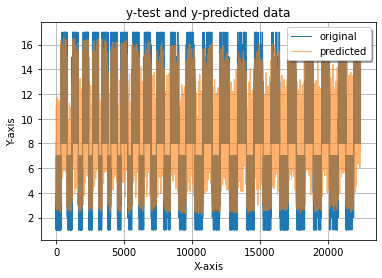

In [ ]:
#Ploting Random Forest Regression Y-test and Y-predicted to see how well it fits
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original",)
plt.plot(x_ax, test_pred_y, linewidth=1.1, label="predicted", alpha = 0.6)
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
rf_reg_best = rf_reg_tuned.best_estimator_

col_names = X_train.columns
fi_df = pd.DataFrame(rf_reg_best.feature_importances_, index=col_names, columns=["Importance"])

fi_df.sort_values("Importance", ascending=False)

,Importance
psize_w,0.310547
reta_w,0.132162
pic_a_w,0.124498
tdta_bar_w,0.099235
ltda_bar_w,0.077776
tang_w,0.073329
oits_bar_w,0.061886
mb_w,0.044684
beta_w,0.038961
pic_b_w,0.028148


Q2

CREATING X AND Y Different Year

In [ ]:
train = rating_rvsd_col.loc[rating_rvsd_col['year'] == 1988]
test = rating_rvsd_col.loc[rating_rvsd_col['year'] > 1988]

In [ ]:
X_train = train.loc[:,['pic_a_w','pic_b_w','pic_c_w','pic_d_w','oits_bar_w','ltda_bar_w','tdta_bar_w','psize_w','beta_w','mb_w','reta_w','tang_w']]
X_test = test.loc[:,['pic_a_w','pic_b_w','pic_c_w','pic_d_w','oits_bar_w','ltda_bar_w','tdta_bar_w','psize_w','beta_w','mb_w','reta_w','tang_w']]


In [ ]:
X_train.head()

,pic_a_w,pic_b_w,pic_c_w,pic_d_w,oits_bar_w,ltda_bar_w,tdta_bar_w,psize_w,beta_w,mb_w,reta_w,tang_w
2352,2.582295,0.0,0.0,0.0,0.363355,0.411696,0.426504,15,0.503788,0.754483,0.115830,0.834115
2353,2.677941,0.0,0.0,0.0,0.092493,0.229550,0.284046,4,0.596514,0.867371,0.063245,0.261614
2354,2.008993,0.0,0.0,0.0,0.047563,0.146837,0.163976,10,0.703701,1.047542,0.184371,0.200407
2355,3.911714,0.0,0.0,0.0,0.204262,0.414949,0.459536,7,0.858502,2.906870,0.112029,0.227509
2356,2.276060,0.0,0.0,0.0,0.168633,0.457377,0.514710,2,0.535144,0.991508,0.095507,0.703532


In [ ]:
y_train = train['rt5_w']
y_test = test['rt5_w']
y_train.head()

2352    5
2353    4
2354    7
2355    5
2356    3
Name: rt5_w, dtype: int64

Random Forest


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
param_grid = {
    "n_estimators":[100,200, 300],
    "max_depth":[10, 20],
    "max_features":['sqrt']
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomForestRegressor(max_depth=20, max_features='sqrt')

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=300,
                               criterion='friedman_mse',
                               max_features='sqrt',
                               max_depth = 10,
                               n_jobs=-1,
                               random_state=1)

rf_reg.fit(X_train, y_train)

train_pred_y = rf_reg.predict(X_train)
test_pred_y = rf_reg.predict(X_test)

print(f"train_MAE = {mean_absolute_error(y_train, train_pred_y)}")
print(f"test_MAE = {mean_absolute_error(y_test, test_pred_y)}")

train_MAE = 0.7560250845753249
test_MAE = 1.6010970883252422


In [ ]:
test['predict_forest'] = test_pred_y
test['diff_forest'] = test['rt5'] - test['predict_forest']
test.head()

<ipython-input-82-f64996a20625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predict_forest'] = test_pred_y
<ipython-input-82-f64996a20625>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['diff_forest'] = test['rt5'] - test['predict_forest']


,year,ratingage,rt5,pic_a,pic_b,pic_c,pic_d,oits_bar,ltda_bar,tdta_bar,...,oits_bar_w,ltda_bar_w,tdta_bar_w,psize_w,beta_w,mb_w,reta_w,tang_w,predict_forest,diff_forest
3131,1989,4,1,1.771303,0.0,0.0,0.0,0.037293,0.506542,0.561078,...,0.037293,0.506542,0.561078,2,0.562268,1.094260,-0.078804,0.100652,2.688931,-1.688931
3132,1989,3,3,2.925416,0.0,0.0,0.0,0.255003,0.497956,0.597128,...,0.255003,0.497956,0.597128,13,2.330190,1.314461,0.026090,0.243278,5.541119,-2.541119
3133,1989,4,5,2.622700,0.0,0.0,0.0,0.138204,0.686713,0.713625,...,0.138204,0.686713,0.713625,5,0.847637,1.005197,0.060105,0.344012,4.243492,0.756508
3134,1989,3,6,4.472291,0.0,0.0,0.0,0.420905,0.358990,0.436706,...,0.420905,0.358990,0.436706,19,0.726868,2.947520,0.130374,0.567315,9.812640,-3.812640
3135,1989,3,4,2.478327,0.0,0.0,0.0,0.085358,0.404239,0.581562,...,0.085358,0.404239,0.581562,2,0.501648,1.336794,0.154162,0.143492,4.094615,-0.094615


In [ ]:
test['diff_forest'].mean()

-0.4112844417551884

Sample starting in 1988 is less strict than 1985, but still overall negative bias in bond ratings. 

In [ ]:
high = test.loc[test['rt5'] >= 8]
low = test.loc[test['rt5'] <= 7]

In [ ]:
print(high['diff_forest'].mean())
print(low['diff_forest'].mean())

0.21801606969342538
-1.190033275379518


In [ ]:
age0 = test.loc[test['ratingage'] == 0]
age0['diff_forest'].mean()

-0.893702191037457

In [ ]:
# Random Forest Regression Results: Accuracy, MSE, RMSE

# Calculate the absolute errors
errors_Rf = abs(test_pred_y - y_test)
# Calculate mean absolute percentage error (MAPE)
mape_Rf = 100 * (errors_Rf / y_test)
# Calculate and display accuracy
accuracy_Rf = 100 - np.mean(mape_Rf)

MSE_Rf = mean_squared_error(y_test, test_pred_y)
RMSE_Rf = math.sqrt(MSE_Rf)

y_pred_tr_Rf = rf_reg.predict(X_train)
training_error_Rf = mean_squared_error(y_train,y_pred_tr_Rf)


print('Accuracy Random Forest:', round(accuracy_Rf, 2), '%.')
print("MSE training error Random Forest:",training_error_Rf)
print('Mean squared error Random Forest:',MSE_Rf)
print("Root Mean Square Error Random Forest:", RMSE_Rf)

Accuracy Random Forest: 71.1 %.
MSE training error Random Forest: 0.9251842910900794
Mean squared error Random Forest: 4.478589109954867
Root Mean Square Error Random Forest: 2.116267731161364


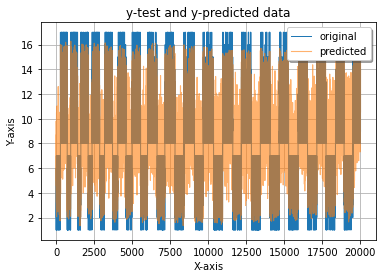

In [ ]:
#Ploting Random Forest Regression Y-test and Y-predicted to see how well it fits
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original",)
plt.plot(x_ax, test_pred_y, linewidth=1.1, label="predicted", alpha = 0.6)
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
rf_reg_best = rf_reg_tuned.best_estimator_

col_names = X_train.columns
fi_df = pd.DataFrame(rf_reg_best.feature_importances_, index=col_names, columns=["Importance"])

fi_df.sort_values("Importance", ascending=False)

,Importance
psize_w,0.274876
reta_w,0.119491
tdta_bar_w,0.114072
ltda_bar_w,0.111263
pic_a_w,0.102568
tang_w,0.077726
oits_bar_w,0.074413
beta_w,0.043992
mb_w,0.037984
pic_b_w,0.032748


Part 2 Conclusion:

Bond ratings were stricter in the period after 1985 based on the mean of actual bond ratings minus predicted values. The negative value indicated the prediction had a more optimistic view of bond ratings rather than the ratings given out in reality. The comparison of high vs. low rated bonds showed a momentum-like bias to where higher rated bonds were overrated in comparison to the sample mean, and low rated bonds were underrated in comparison to the sample mean. New bonds were also underrated based on the prediction, as the mean difference value was a greater negative value than the sample mean. 

Trends from the first sample were consistent with the second sample based on the year 1988. The main difference between the results was that bond ratings based on 1988 were across the board looser than the initial sample. 

## Dif Version Random Forest

In [ ]:
# GridSearchCV in order to find best parameters: n_estimators and max_depth for Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2,20),
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 20),
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Best parameters found using GridSearchCV
grid_search.best_params_

{'max_depth': 17, 'n_estimators': 200}

In [ ]:
# Apply Random Forest Regressor Using best parameters from GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200, max_depth=17)
model = forest.fit(X_train, y_train)
predictions = forest.predict(X_test)

In [ ]:
import math
# Random Forest Regression Results: Accuracy, MSE, RMSE

# Calculate the absolute errors
errors_Rf = abs(predictions - y_test)
# Calculate mean absolute percentage error (MAPE)
mape_Rf = 100 * (errors_Rf / y_test)
# Calculate and display accuracy
accuracy_Rf = 100 - np.mean(mape_Rf)

MSE_Rf = mean_squared_error(y_test, predictions)
RMSE_Rf = math.sqrt(MSE_Rf)

y_pred_tr_Rf = model.predict(X_train)
training_error_Rf = mean_squared_error(y_train,y_pred_tr_Rf)


print('Accuracy Random Forest:', round(accuracy_Rf, 2), '%.')
print("MSE training error Random Forest:",training_error_Rf)
print('Mean squared error Random Forest:',MSE_Rf)
print("Root Mean Square Error Random Forest:", RMSE_Rf)

Accuracy Random Forest: 71.67 %.
MSE training error Random Forest: 0.5206319424682518
Mean squared error Random Forest: 4.6012437262738315
Root Mean Square Error Random Forest: 2.145050984539489


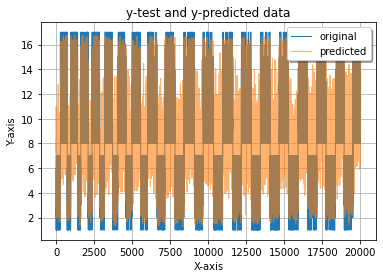

In [ ]:
import matplotlib.pyplot as plt
#Ploting Random Forest Regression Y-test and Y-predicted to see how well it fits
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original",)
plt.plot(x_ax, predictions, linewidth=1.1, label="predicted", alpha = 0.6)
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

**Part 3**

In [ ]:
default_rate = pd.read_csv(/content/drive/Shareddrives/Group Project 745/default_by_rating.csv)